In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
url = 'https://raw.githubusercontent.com/Enrico-13/Atividade-02/main/Dados/train.csv'
df = pd.read_csv(url)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [102]:
qualitative = [column for column in df.columns if df.dtypes[column] == object]
quantitative = [column for column in df.columns if df.dtypes[column] != object]
quantitative.remove('SalePrice')
quantitative.remove('Id')

In [103]:
qualitative_columns = pd.DataFrame(qualitative)
qualitative_columns.columns = ['qualitativas']

quantitative_columns = pd.DataFrame(quantitative)
quantitative_columns.columns = ['quantitativas']

In [104]:
# excel_path = '../Dados/exploracao.xlsx'
# with pd.ExcelWriter(excel_path, engine='xlsxwriter') as writer:
#     workbook = writer.book

#     qualitative_columns.to_excel(writer, sheet_name='qualitativas', index=False, startcol=1, startrow=1)
#     quantitative_columns.to_excel(writer, sheet_name='quantitativas',index=False, startcol=1, startrow=1)


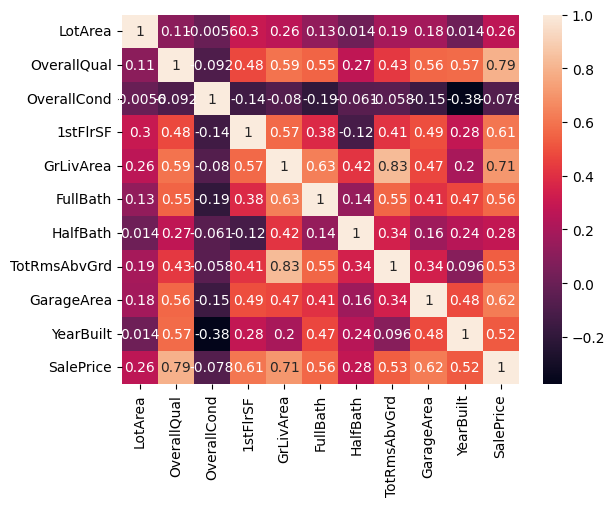

In [105]:
correl_testing = [
    'LotArea',
    'OverallQual',
    'OverallCond',
    '1stFlrSF',
    'GrLivArea',
    'FullBath',
    'HalfBath',
    'TotRmsAbvGrd',
    'GarageArea',
    'YearBuilt',
    'SalePrice'
]

corrmat = df[correl_testing].corr()
sns.heatmap(corrmat, annot=True)
# OverallCond tem pouca correlação, então será retirada
correl_testing.remove('OverallCond')

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

train_data = df[correl_testing].copy()
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [107]:
y_pred = reg.predict(X_test)

print(reg.score(X_test, y_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.812497458563525
RMSE: 35596.26684542125


In [118]:
url = 'https://raw.githubusercontent.com/Enrico-13/Atividade-02/main/Dados/test.csv'
test_df = pd.read_csv(url)

In [121]:
# correl_testing.remove('SalePrice')
test_df = test_df[correl_testing]
test_df = test_df.fillna(0)

In [122]:
y_pred = reg.predict(test_df)
y_pred

array([127551.43171979, 169937.86629427, 167014.41235847, ...,
       150904.24517375, 114311.4716899 , 234293.46591874])

In [123]:
test_df['SalePrice'] = y_pred

In [124]:
test_df

LotArea  OverallQual  1stFlrSF  GrLivArea  FullBath  HalfBath  \
0       11622            5       896        896         1         0   
1       14267            6      1329       1329         1         1   
2       13830            5       928       1629         2         1   
3        9978            6       926       1604         2         1   
4        5005            8      1280       1280         2         0   
...       ...          ...       ...        ...       ...       ...   
1454     1936            4       546       1092         1         1   
1455     1894            4       546       1092         1         1   
1456    20000            5      1224       1224         1         0   
1457    10441            5       970        970         1         0   
1458     9627            7       996       2000         2         1   

      TotRmsAbvGrd  GarageArea  YearBuilt      SalePrice  
0                5       730.0       1961  127551.431720  
1                6       312.0       1958  169937.866294  
2                6       482.0       1997  167014.412358  
3                7       470.0       1998  186312.478669  
4                5       506.0       1992  219029.159448  
...            ...         ...        ...            ...  
1454             5         0.0       1970   75135.151252  
1455             6       286.0       1970   86777.953539  
1456             7       576.0       1960  150904.245174  
1457             6         0.0       1992  114311.471690  
1458             9       650.0       1993  234293.465919  

[1459 rows x 10 columns]

In [134]:
test_df['Id'] = test_df.index + 1461
test_df

LotArea  OverallQual  1stFlrSF  GrLivArea  FullBath  HalfBath  \
0       11622            5       896        896         1         0   
1       14267            6      1329       1329         1         1   
2       13830            5       928       1629         2         1   
3        9978            6       926       1604         2         1   
4        5005            8      1280       1280         2         0   
...       ...          ...       ...        ...       ...       ...   
1454     1936            4       546       1092         1         1   
1455     1894            4       546       1092         1         1   
1456    20000            5      1224       1224         1         0   
1457    10441            5       970        970         1         0   
1458     9627            7       996       2000         2         1   

      TotRmsAbvGrd  GarageArea  YearBuilt      SalePrice    Id  
0                5       730.0       1961  127551.431720  1461  
1                6       312.0       1958  169937.866294  1462  
2                6       482.0       1997  167014.412358  1463  
3                7       470.0       1998  186312.478669  1464  
4                5       506.0       1992  219029.159448  1465  
...            ...         ...        ...            ...   ...  
1454             5         0.0       1970   75135.151252  2915  
1455             6       286.0       1970   86777.953539  2916  
1456             7       576.0       1960  150904.245174  2917  
1457             6         0.0       1992  114311.471690  2918  
1458             9       650.0       1993  234293.465919  2919  

[1459 rows x 11 columns]

In [135]:
output = test_df[['Id', 'SalePrice']]
output

Id      SalePrice
0     1461  127551.431720
1     1462  169937.866294
2     1463  167014.412358
3     1464  186312.478669
4     1465  219029.159448
...    ...            ...
1454  2915   75135.151252
1455  2916   86777.953539
1456  2917  150904.245174
1457  2918  114311.471690
1458  2919  234293.465919

[1459 rows x 2 columns]

In [133]:
file_path = '../Dados/test_results.csv'
output.to_csv(file_path, sep=',', index=False)